**MatSoc: Intro to ML Techniques**

Assignment 2

Deadline : Wednesday, 3 January 2024, 23:59 IST

Name : Prabhanshu Choudhary

Roll Number : 220773

IITK Email :  prabhanshu22@iitk.ac.in

You may use the ML library of your choice to do this part.

1. Find the best fit degree of polynomial for the given data (use the data 1 link)
2. Predict the model for the given data (use data link 2)
3. Solve this competition (use logisitic regression): https://www.kaggle.com/t/6ac9ca8159f64c4eb794206a735a61ca

Use everything you have learned till date in part 3, its a competition!!!

  Note that the code for all parts must be visible

  Make sure all the code is run before you submit the notebook

  share a link to the notebook for problem 3 in this colab notebook if you use
  a different notebook for part 3.




---







**1.**

In [ ]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import files

In [ ]:
# upload dataset

uploaded=files.upload()
df=pd.read_csv('data_week2_1.csv')
df

Saving data_week2_1.csv to data_week2_1.csv


,Unnamed: 0,x,y
0,0,0.00,2.700000
1,1,0.01,2.799301
2,2,0.02,2.597209
3,3,0.03,3.893730
4,4,0.04,4.588872
...,...,...,...
495,495,4.95,17.124360
496,496,4.96,16.755608
497,497,4.97,16.388790
498,498,4.98,16.323911


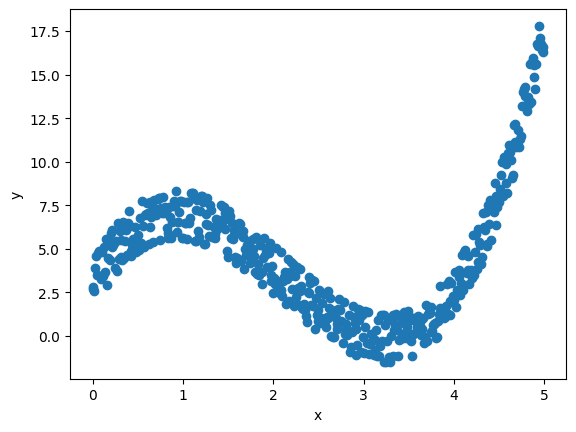

In [ ]:
#plot the scatter plot

plt.scatter(df.x,df.y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# split data into traing and testing sets

x_train,x_test,y_train,y_test=train_test_split(df.x,df.y,train_size=0.8,random_state=42)

Degree: 1 MSE: 18.439220905773226
Degree: 2 MSE: 8.893912573228592
Degree: 3 MSE: 0.7337308483618468
Degree: 4 MSE: 0.9094486810752614
Degree: 5 MSE: 0.8681839578093644
Degree: 6 MSE: 0.8577686178905399
Degree: 7 MSE: 0.8794226187933724
Degree: 8 MSE: 0.8448516543541811
Degree: 9 MSE: 0.8702208436220138
Mean squared error: 0.7337308483618468
Root mean squared error: 0.8565809059054765


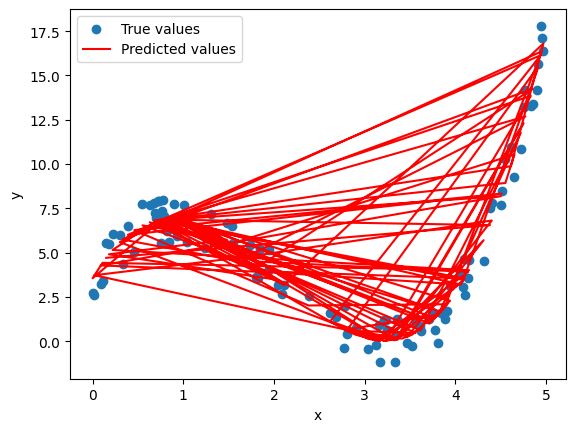

Best degree: 3


In [ ]:
# Finding best fit degree polynomial

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Initialize variables to store the best degree and MSE
best_degree = 1
min_mse = float('inf')

# Loop through degrees to find the best fit with Ridge regularization
for degree in range(1, 10):
    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train.values.reshape(-1, 1))
    x_test_poly = poly.transform(x_test.values.reshape(-1, 1))

    model = Ridge(alpha=1)  # You can adjust the alpha value based on the level of regularization needed
    model.fit(x_train_poly, y_train)

    # Calculate MSE for the test set
    y_pred = model.predict(x_test_poly)
    mse = mean_squared_error(y_test, y_pred)

    print("Degree:", degree, "MSE:", mse)

    if mse < min_mse:  # Update best degree and minimum MSE if a lower MSE is found
        min_mse = mse
        best_degree = degree
        best_model = model
        best_poly = poly

# Predict the values for the test set using the best model and degree
x_test_poly = best_poly.transform(x_test.values.reshape(-1, 1))
y_pred = best_model.predict(x_test_poly)

# Evaluate the model
print('Mean squared error:', min_mse)
print('Root mean squared error:', np.sqrt(min_mse))

# Plot the predicted values against the true values
plt.scatter(x_test, y_test, label='True values')
plt.plot(x_test, y_pred, color='red', label='Predicted values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Display the best degree
print("Best degree:", best_degree)




---



**2.** For second dataset

In [ ]:
# upload the second dataset

uploaded=files.upload()
df2=pd.read_csv("dataweek2.csv")
df2

Saving dataweek2.csv to dataweek2.csv


,Unnamed: 0,x,y
0,0,0,1.000000
1,1,1,1.836422
2,2,2,0.114749
3,3,3,-0.988580
4,4,4,-0.915767
...,...,...,...
295,295,295,0.357359
296,296,296,1.898804
297,297,297,0.755299
298,298,298,-0.856214


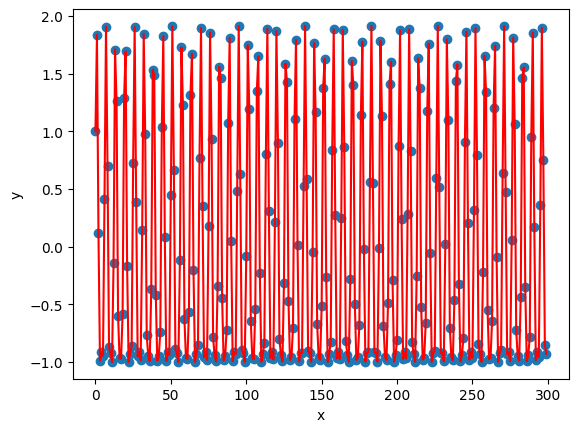

In [ ]:
# plot the datapoints

plt.scatter(df2.x,df2.y)
plt.plot(df2.x,df2.y,color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
from scipy.optimize import curve_fit
# Define the sine function
sine_func = lambda x, a,d, b,e, c,f,g,h: a * np.sin(d*df2.x) + b * np.cos(e*df2.x) +c*(np.cos(f*df2.x)*np.sin(g*df2.x)) + h

# Fit the sine function to the data
popt, pcov = curve_fit(sine_func, df2.x, df2.y)

# Print the fitted parameters
print("a:", popt[0])
print("d:", popt[1])
print("b:", popt[2])
print("e:", popt[3])
print("c:", popt[4])
print("f:", popt[5])
print("g:", popt[6])
print("h:", popt[7])



a: 1.0000000000090408
d: 0.9999999999999698
b: 1.0000000000243034
e: 0.9999999999998993
c: 1.0000000000422327
f: 1.0000000000030356
g: 0.9999999999969279
h: 6.189869213366875e-10


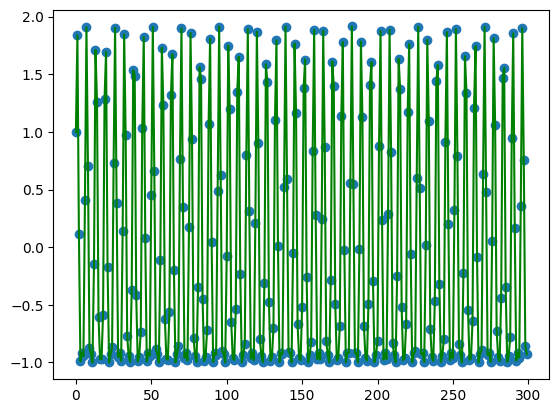

In [ ]:
# Create the sine function
sine_func = (1.0000000000090408*np.sin( 0.9999999999999698*df2.x)
+1.0000000000243034*np.cos(0.9999999999998993*df2.x)
+1.0000000000422327*np.sin(1.0000000000030356*df2.x)*np.cos(0.9999999999969279*df2.x))
+6.189869213366875e-10

# Plot the data points and the sine function
plt.scatter(df2.x, df2.y)
plt.plot(df2.x, sine_func,color='green')
plt.show()

The function which best fits on the given data points is nearly
y=sinx+cosx+sinxcosx



---

